In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1.2 Numerische Lösung der Advektionsgleichung

In [14]:
def Anfangsbedigungen(Nx,CFL,verbose=True):
    xmax = 10 
    xmin = 0
    dx = (xmax-xmin)/Nx 
    x = np.linspace(xmin, xmax, Nx) 
    dt = CFL*dx                     # Zeitschrittweite
    t_ende = 5                      # Endzeit
    Nt = int(t_ende/dt)             # Anzahl der Zeitschritte
    
    #Upwind-Verfahren
    c_positiv = 1*(dt/dx)
    c_negativ = 0
    
    #Lax-Friedrich / Lax-Wendroff-Verfahren
    c=dt/dx
    
    # Glatte Anfangsbedingung
    Uo_glatt = np.exp(-2.5*(x-2)**2)
    
    # Initialisierung der Zustandsmatrix
    U_glatt = np.zeros((Nt+1, Nx))
    U_glatt[0] = Uo_glatt
    
    # Unstetige Anfangsbedingung
    Uo_unstetig = np.where(np.logical_and(x>=1, x<=3), 1, 0)
    
    # Initialisierung der Zustandsmatrix
    U_unstetig = np.zeros((Nt+1, Nx))
    U_unstetig[0] = Uo_unstetig
    
    if verbose:
        return U_glatt, U_unstetig, c_positiv, c_negativ, Nt, Nx, x, dt #Upwind-Verfahren
    else:
        return U_glatt, U_unstetig, c, Nt, Nx,x,dt #Lax-Friedrich / Lax-Wendroff-Verfahren
    
    

In [15]:
def upwind_verfahren(Nx, CFL=1):    
    
    U_glatt, U_unstetig, c_positiv, c_negativ, Nt, Nx, x, dt = Anfangsbedigungen(Nx,CFL)
    
    #Lösung des beschriebenen Problems
    for n in range(Nt):
        for i in range(1, Nx-1):
            U_glatt[n+1, i] = U_glatt[n, i] - c_positiv*(U_glatt[n, i] - U_glatt[n, i-1]) + c_negativ*(U_glatt[n, i+1] - U_glatt[n, i])
            U_unstetig[n+1, i] = U_unstetig[n, i] - c_positiv*(U_unstetig[n, i] - U_unstetig[n, i-1]) + c_negativ*(U_unstetig[n, i+1] - U_unstetig[n, i])
        #Randbedingungen
        U_glatt[n+1, 0] = 0
        U_glatt[n+1, Nx-1] = 0
        U_unstetig[n+1, 0] = 0
        U_unstetig[n+1, Nx-1] = 0
            
    return U_glatt, U_unstetig, x, dt
# Frage: Es ist noch nicht ganz klar mit den Randbedingungen

i) Löse das beschriebene Problem mithilfe des Upwind-Verfahrens für die glatte und unstetige Anfangsbedingung

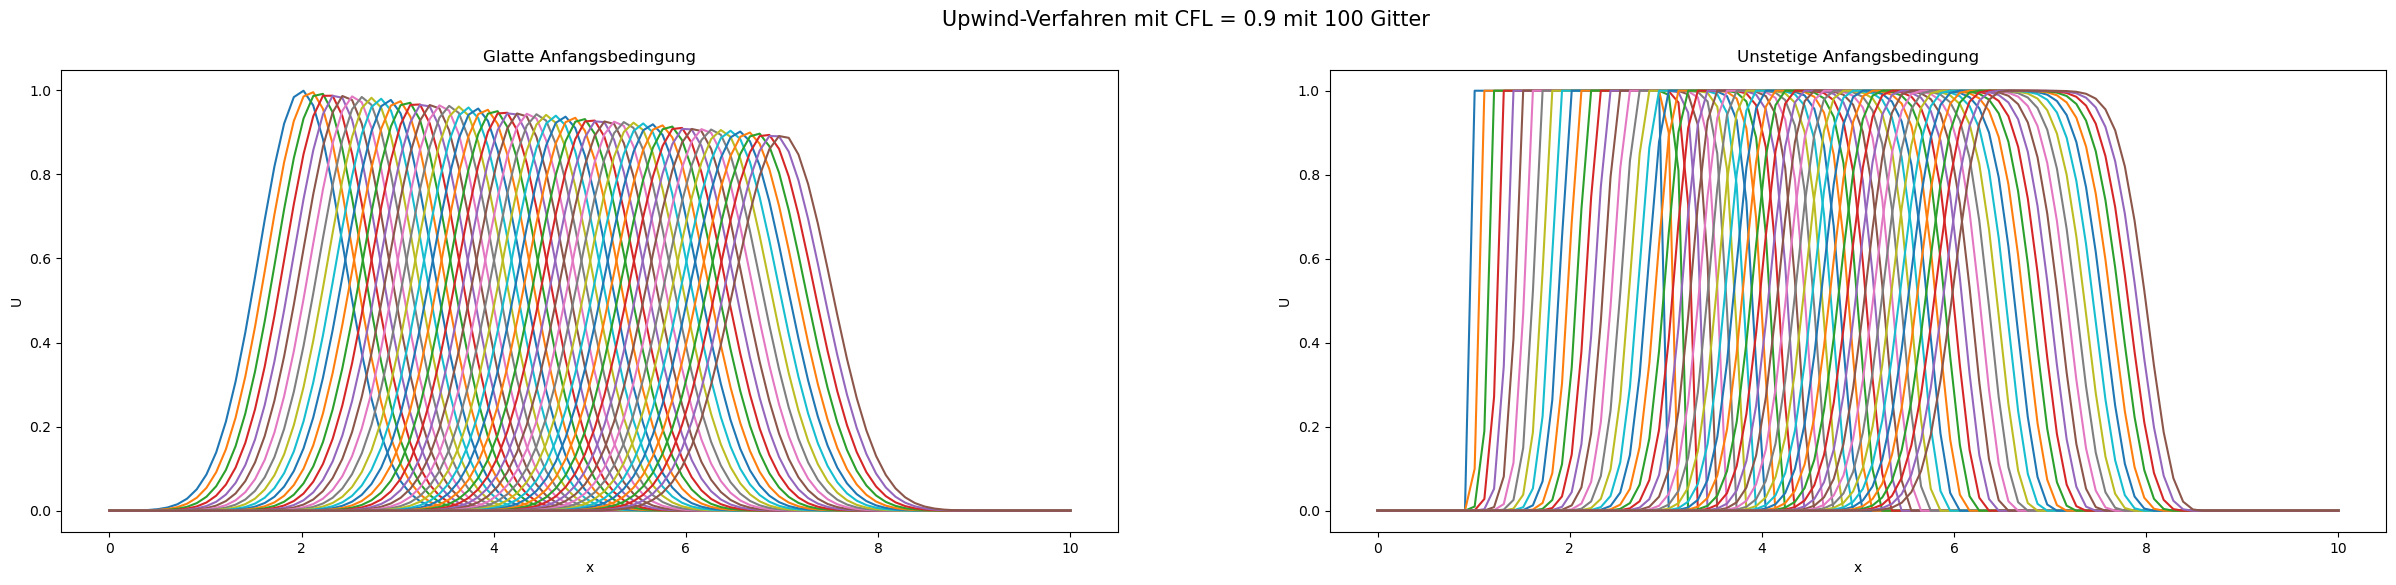

In [16]:
N = 100 
CFL = 0.9
# Plot der Lösung    
f1 = plt.figure(figsize=(30, 6))
plt.suptitle('Upwind-Verfahren mit CFL = 0.9 mit 100 Gitter', fontsize=15)

U_glatt, U_unstetig, x, dt = upwind_verfahren(N, CFL)

ax1 = plt.subplot(121)
for n in range(U_glatt.shape[0]):
    plt.plot(x, U_glatt[n], label='t='+str(n*dt))
plt.title('Glatte Anfangsbedingung')
plt.xlabel('x')
plt.ylabel('U')

ax2 = plt.subplot(122)
for n in range(U_unstetig.shape[0]):
    plt.plot(x, U_unstetig[n], label='t='+str(n*dt))
plt.title('Unstetige Anfangsbedingung')
plt.xlabel('x')
plt.ylabel('U')

plt.show()

ii) Führe die Berechnung für verschiedene Netzauflösungen N = 20, N = 50 ,N = 100, N = 200 und verschiedene CFL-Zahlen ≤ 1 durch und vergleiche die so berechneten numerischen Lösungen mit der analytischen Lösung.

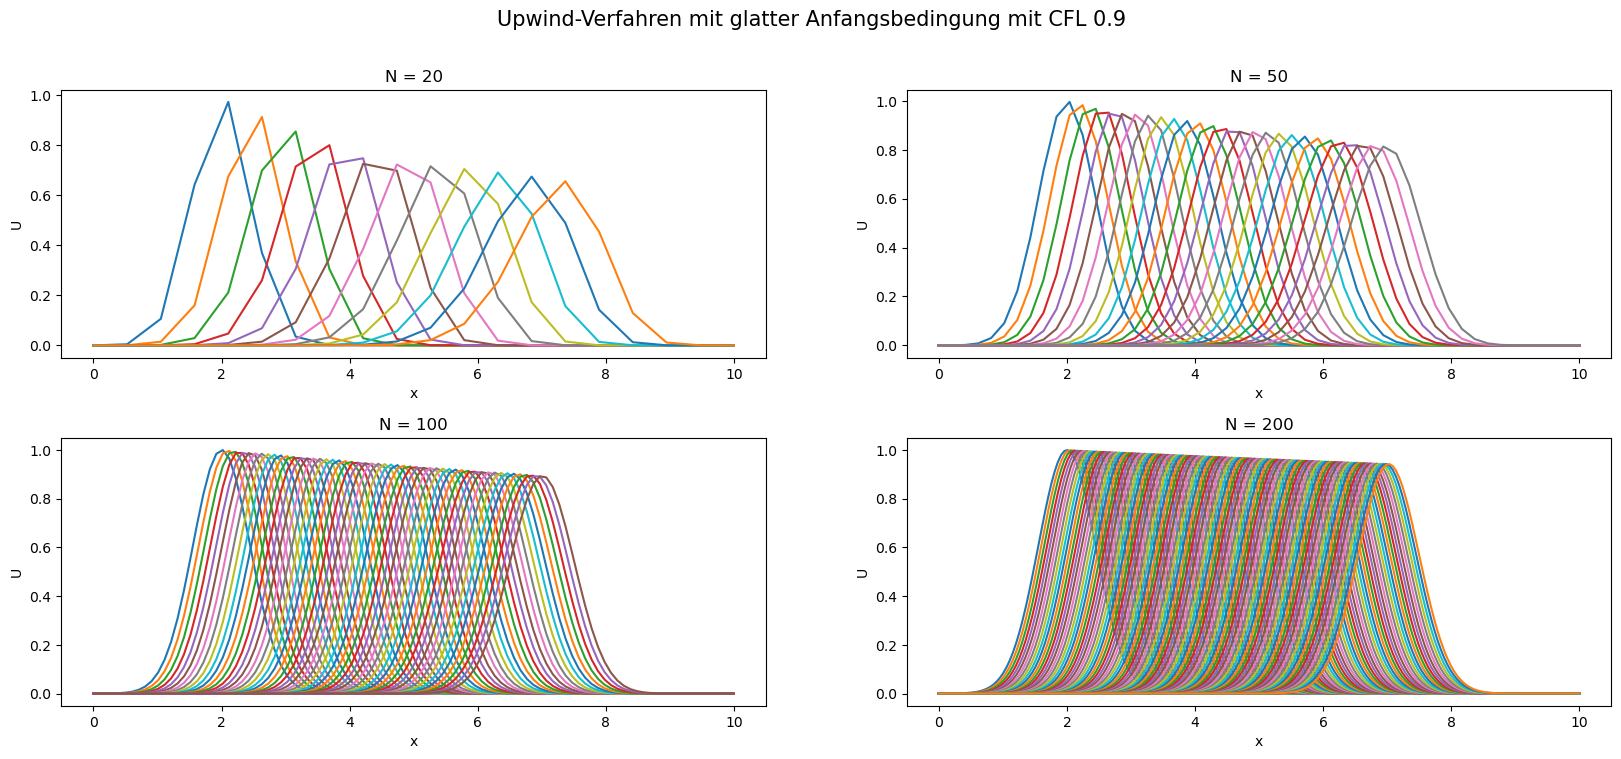

In [17]:
N = [20, 50, 100, 200]
CFL = 0.9

# Plot der Lösung mit subplot
f2 = plt.figure(figsize=(20, 8))
plt.suptitle(f'Upwind-Verfahren mit glatter Anfangsbedingung mit CFL {CFL}', fontsize=15)
for k in range(len(N)):
    U_glatt, U_unstetig, x_ii,dt = upwind_verfahren(N[k], CFL)
    
    ax = f2.add_subplot(2, 2, k+1)
    for n in range(U_glatt.shape[0]):
        ax.plot(x_ii, U_glatt[n], label='t='+str(k*dt))
        # ax.plot(x_ii, U_unstetig[n], label='t='+str(k*dt))
    ax.set_xlabel('x')
    ax.set_ylabel('U')
    ax.title.set_text('N = '+str(N[k]))
plt.subplots_adjust(hspace=0.3)
plt.show()


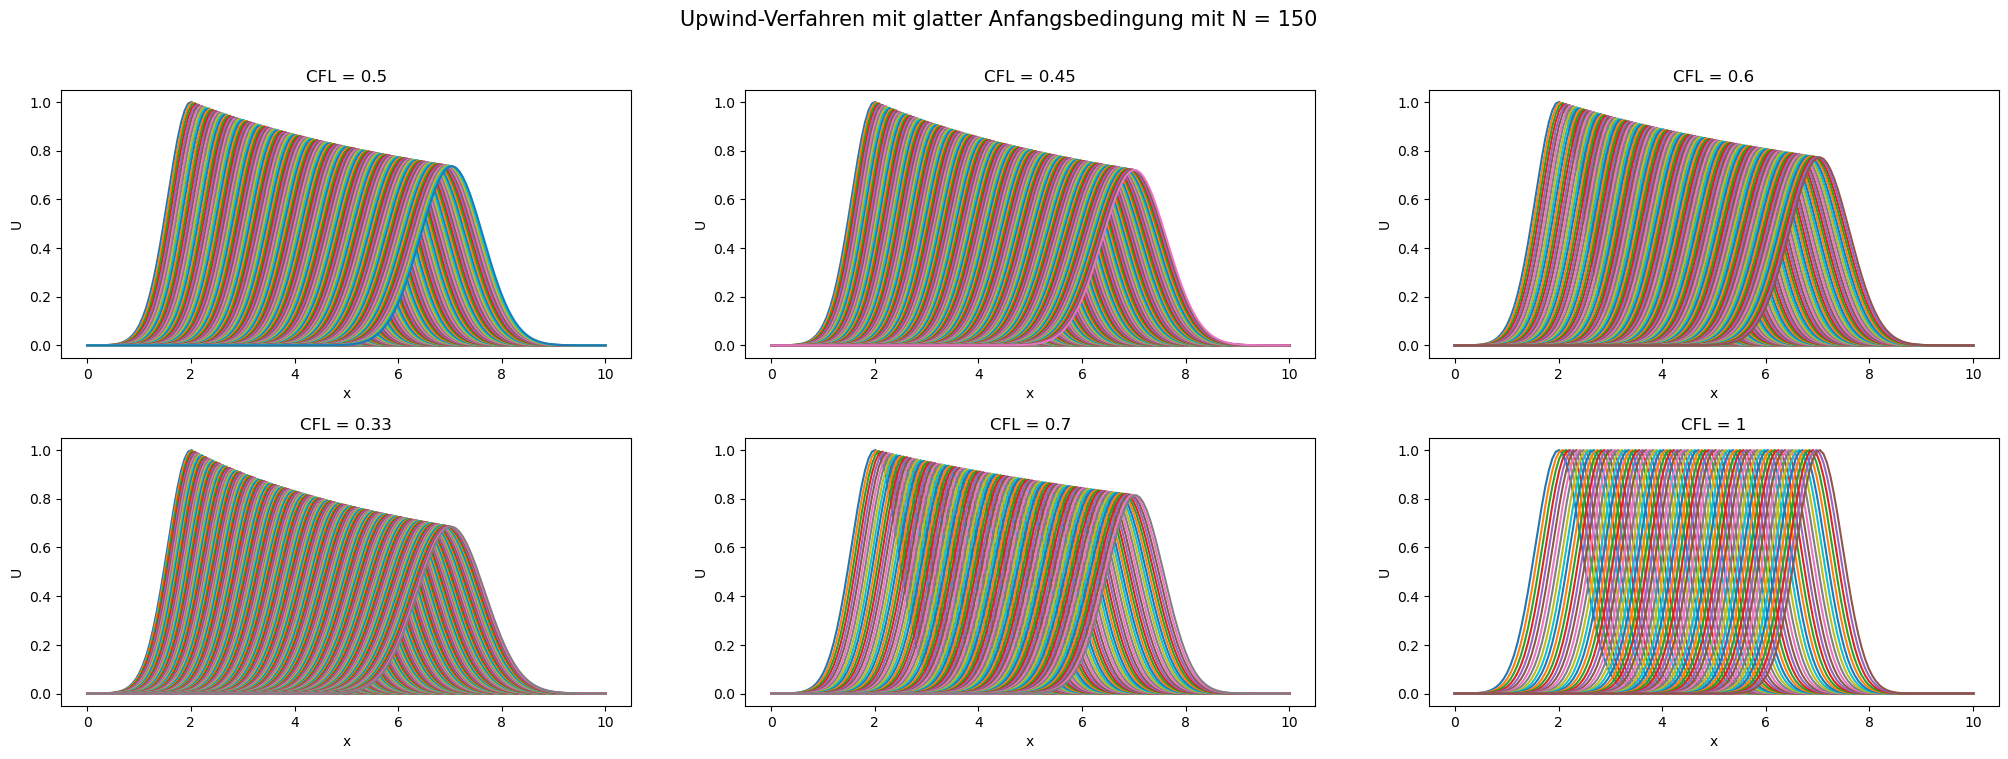

In [18]:
CFL = [0.5, 0.45, 0.6, 0.33, 0.7, 1]
N = 150

# Plot der Lösung mit subplot
f3 = plt.figure(figsize=(25, 8))
plt.suptitle(f'Upwind-Verfahren mit glatter Anfangsbedingung mit N = {N}', fontsize=15)
for k in range(len(CFL)):
    U_glatt, U_unstetig, x_ii,dt = upwind_verfahren(N, CFL[k])
    
    #Subplots
    ax = f3.add_subplot(2, 3, k+1)
    for n in range(U_glatt.shape[0]):
        ax.plot(x_ii, U_glatt[n], label='t='+str(k*dt))
        # ax.plot(x_ii, U_unstetig[n], label='t='+str(k*dt))
    ax.set_xlabel('x')
    ax.set_ylabel('U')
    ax.title.set_text('CFL = '+str(CFL[k]))
plt.subplots_adjust(hspace=0.3)
plt.show()


iii) Führe die Berechnungen aus i) mit dem Lax-Friedrich und dem Lax-Wendroff Verfahren durch und vergleiche die Lösungen mit denen des Upwindverfahrens

In [28]:
def lax_friedrich(Nx, CFL):
    U_glatt, U_unstetig, c, Nt, Nx, x, dt = Anfangsbedigungen(Nx,CFL,verbose = False)
    #Lösung des beschriebenen Problems
    for n in range(Nt):
        for i in range(1, Nx-1):
            U_glatt[n+1, i] = 0.5*(U_glatt[n, i+1] + U_glatt[n, i-1]) - 0.5*c*(U_glatt[n, i+1] - U_glatt[n, i-1])
            U_unstetig[n+1, i] = 0.5*(U_unstetig[n, i+1] + U_unstetig[n, i-1]) - 0.5*c*(U_unstetig[n, i+1] - U_unstetig[n, i-1])
        #Randbedingungen
        U_glatt[n+1, 0] = 0
        U_glatt[n+1, Nx-1] = 0
        U_unstetig[n+1, 0] = 0
        U_unstetig[n+1, Nx-1] = 0
            
    return U_glatt, U_unstetig, x, dt

def lax_wendroff(Nx, CFL):
    U_glatt, U_unstetig, c, Nt, Nx, x, dt = Anfangsbedigungen(Nx,CFL,verbose = False)
    #Lösung des beschriebenen Problems
    for n in range(Nt):
        for i in range(1, Nx-1):
            U_glatt[n+1, i] = U_glatt[n, i] - 0.5*c*(U_glatt[n, i+1] - U_glatt[n, i-1]) + 0.5*c**2*(U_glatt[n, i+1] - 2*U_glatt[n, i] + U_glatt[n, i-1])
            U_unstetig[n+1, i] = U_unstetig[n, i] - 0.5*c*(U_unstetig[n, i+1] - U_unstetig[n, i-1]) + 0.5*c**2*(U_unstetig[n, i+1] - 2*U_unstetig[n, i] + U_unstetig[n, i-1])
        #Randbedingungen
        U_glatt[n+1, 0] = 0
        U_glatt[n+1, Nx-1] = 0
        U_unstetig[n+1, 0] = 0
        U_unstetig[n+1, Nx-1] = 0
    
    return U_glatt, U_unstetig, x, dt

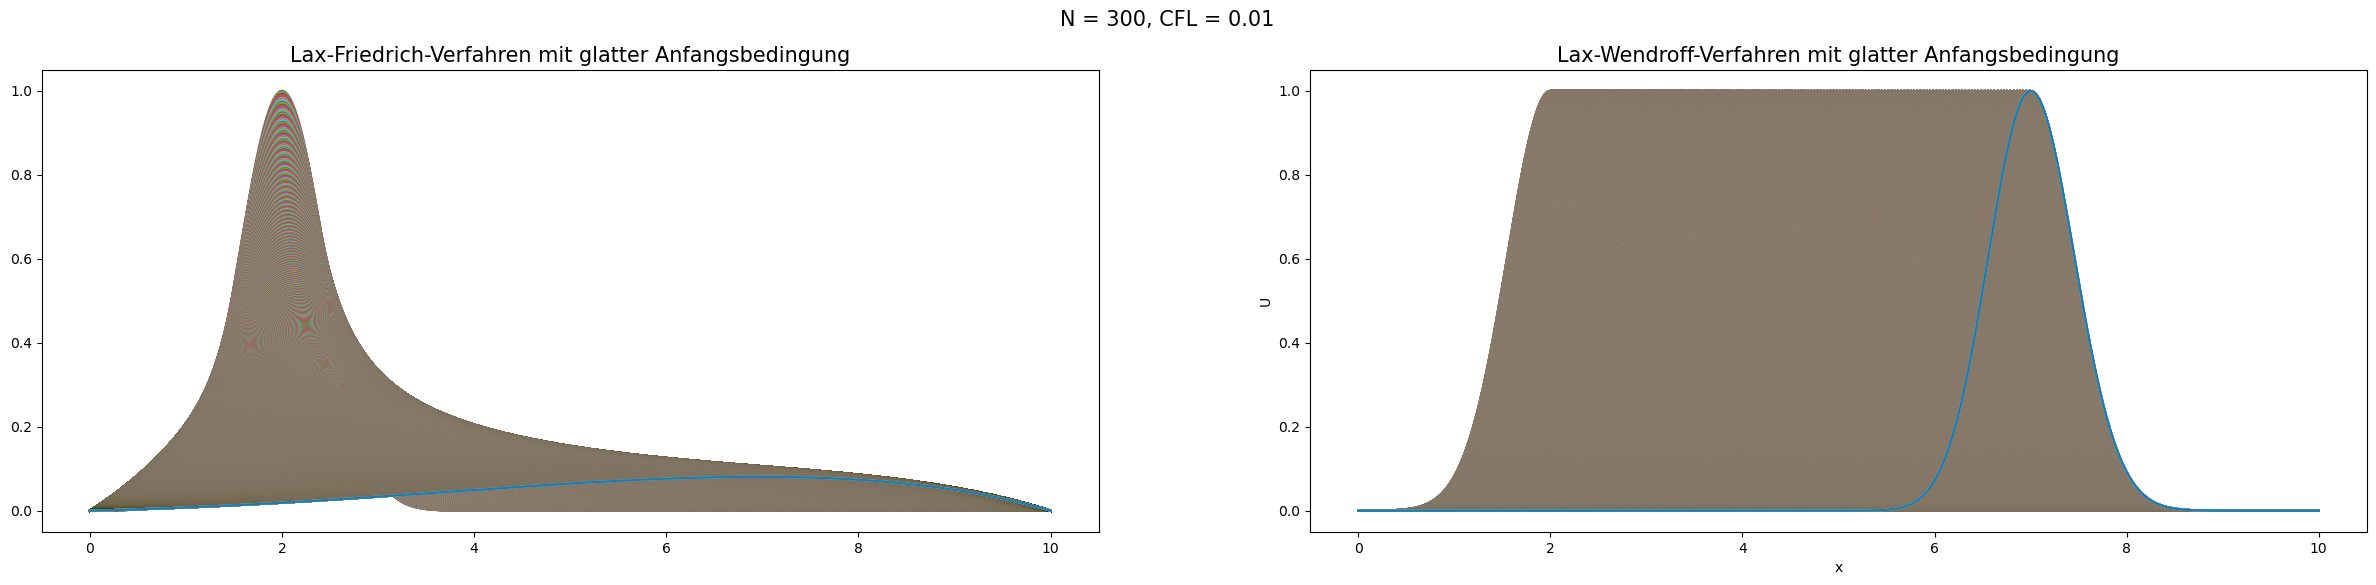

In [47]:
#Plot der Lösung

Nx=300
CFL=0.01

f4 = plt.figure(figsize=(30, 6))
plt.suptitle(f'N = {Nx}, CFL = {CFL}', fontsize=15)
ax = f4.add_subplot(121)
U_glatt, U_unstetig, x, dt = lax_friedrich(Nx, CFL)
for n in range(U_glatt.shape[0]):
    plt.plot(x, U_glatt[n], label='t='+str(n*dt))
    # plt.plot(x, U_unstetig[n], label='t='+str(n*dt))
plt.title(f'Lax-Friedrich-Verfahren mit glatter Anfangsbedingung', fontsize=15)

ax = f4.add_subplot(122)
U_glatt, U_unstetig, x, dt = lax_wendroff(Nx, CFL)
plt.title(f'Lax-Wendroff-Verfahren mit glatter Anfangsbedingung', fontsize=15)
for n in range(U_glatt.shape[0]):
    plt.plot(x, U_glatt[n], label='t='+str(n*dt))
    # plt.plot(x, U_unstetig[n], label='t='+str(n*dt))

ax.set_xlabel('x')
ax.set_ylabel('U')
plt.show()

#Schlussfolgerung: Lax-Wendroff-Verfahren ist besser als Lax-Friedrich-Verfahren, bleibt es immer stabiler für großes N, 
#obwohl CFL kleiner ist? Man versuchte mit Extremwerten; CFL=0.01 und N=300 , aber es ist immer noch stabil.